#Featurs Extraction for image classification ==> toward learning

We will learn in this exercise how to:

1.   Prepare image to be classified
2.   Create an image classifier
3.   Classify an image using a classifier created from the scratch



Let's recognize the orinatation of bar (white color) in the following images (horizontal and vertical) (background is black)


![picture](https://drive.google.com/uc?id=1rLaKnxTAlIzOjH6rWpYIsJIFc_v-WZbZ)  ![picture](https://drive.google.com/uc?id=1RW32gK9PvqDLO7vTp62qQsS0LKF2NvTk)


Let’s consider these simple images to have a size of 3×3 (3 pixels of width and 3 of height).
Let’s now focus only on one image, we will take the vertical one. The image to the computer will look like this:

Vertical:
[[ 0 255 0]
[ 0 255 0]
[ 0 255 0]]


Download images: [vertical](https://drive.google.com/file/d/1AF6j9fU3j5GtQPCuZ5OyqOT_paF-eItn/view?usp=share_link)
[Horizontal](https://drive.google.com/file/d/1EjHgADGmJT0rJa8q8TFAB4_OT2ORiicm/view?usp=share_link) 


In [ ]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1AF6j9fU3j5GtQPCuZ5OyqOT_paF-eItn
!gdown https://drive.google.com/uc?id=1EjHgADGmJT0rJa8q8TFAB4_OT2ORiicm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1AF6j9fU3j5GtQPCuZ5OyqOT_paF-eItn
To: /content/vertical.png
100% 557/557 [00:00<00:00, 729kB/s]
Downloading...
From: https://drive.google.com/uc?id=1EjHgADGmJT0rJa8q8TFAB4_OT2ORiicm
To: /content/horizontal.png
100% 552/552 [00:00<00:00, 839kB/s]


In [ ]:
import cv2
import numpy as np

## Applying convolution

We add a filter to convolute the image and to extract feature. Fo simplicity, a filter in this case will be an array of the same size of the image so containing 9 numbers.


```
filter = [1, -1, 1, -1, 1, -1, 1, -1, 1]
```

Convolution (simple):


```
convolution = sum(img_flattened * filter)

```
Perform the steps:


1.   Read "horisontal.png"

2.   Normalize it
3. Flatten the image
4. Define the filter matrix
5. Convlute the image using the filter
6. Print the result of convolution
7. read a new image "vertical.png" and repeat the steps from 2 to 6
8. determine a condition that distinguish betwen vertical and horizontal features







In [ ]:
img = cv2.imread('/content/horizontal.png', cv2.IMREAD_GRAYSCALE)
print(img)

# 1) Simplify image by dividing 255
img = img / 255

# 2) Flatten the image
img_flattened = img.flatten()

# 3) Filter
filter = [1, -1, 1, 
          1, -1, 1, 
          1, -1, 1]

# 4) Multiply filter * flattened image
convolution = img_flattened * filter

# 5) Sum
sum_convolution = sum(convolution)
print(sum_convolution)
# 6) Condition
if sum_convolution == 1:
    print("Horizontal")
else:
    print("Vertical")

[[  0   0   0]
 [255 255 255]
 [  0   0   0]]
1.0
Horizontal


## Put the process in a function for tests
Define a function to do the process (input: image, output vertical or horizontal)


In [ ]:
## Put the process in a function

def classify_image(img):
    # 1) Simplify image by dividing 255
    img = img / 255

    # 2) Flatten the image
    img_flattened = img.flatten()

    # 3) Filter
    filter = [1, -1, 1, 1, -1, 1, 1, -1, 1]

    # 4) Multiply filter * flattened image
    convolution = img_flattened * filter

    # 5) Sum
    sum_convolution = sum(convolution)

    # 6) Condition
    if sum_convolution == 1:
        return "Horizontal"
    else:
        return "Vertical"

## Testing your classifier 
We are going to test classifier with some new images of similar features.

The idea would be that in only one line we can call the classifier and it is going to tell us whether the image is a vertical or a horizontal line.


---




![picture](https://drive.google.com/uc?id=14_EzE6JI5ZIGNZT8X3uEBSkaSmcLqUr3) 
_________________
 ![picture](https://drive.google.com/uc?id=1J8ij0MPJZ1KekISjOPl1kWg-uMPMLp3J)
____________________________________________________________________


Download new images:  [bottom_Horizontal](https://drive.google.com/file/d/1hcacenV2IkOjANBZ3mLdklGYT_L6mwTB/view?usp=share_link), [left_vertical](https://drive.google.com/file/d/1D2tfKgTHGjLqvly0F6Qhm6B775gzNjX8/view?usp=share_link) , 


In [ ]:
img = cv2.imread("vertical.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("horizontal.png", cv2.IMREAD_GRAYSCALE)
img3 = read "bottom_horizontal.png"
img4 = read("left_vertical.png"



result = classify_image(img3)
print(result)

Horizontal


This is done by a pre-defined filter, that is able to detect the horizontal and vertical lines. 

The **drawback** of that classifier was that we needed to create manually the filter to classify the images. So if we wanted to classify different type of images, we would need again to create manually a new filter.



# Classifier of Various Images 
To tackle the drawback of previous classifier, we have to let the computer do the task of defining the filter automatically, so that it will find a filter for different images of horizontal and vertical lines, bot not necessarily identical 

## Process the image within a function 
First of all, we create a function to preprocess the image before applying the classifier, so that instead of dividing each single image by 255 and flattening it, we will get in return this operation aleady executed by the function.

The function preprocess_img will take the image path and give in return the image ready to bre processed by the classifier.

In [ ]:
def preprocess_img(path_img):
  # read the image
    

    # Normalize the image
    

    # Flatten the image
    
    return flattened_image

In [ ]:
flattened_vertical = preprocess_img("vertical.png")
flattened_horizontal = preprocess_img("horizontal.png")

## Identify the filter 
To find the proper filter, it must give a unique indicator for each image of similar features ( different value for different image)
If it would return the same result, would be a bad filter because no matter if you give a vertical line or a horizontal line you get the same result and there is no distinction.

### How do we create the filter?
We create the filter putting random numbers from -1 to 1. There is a numpy function that does that: np.random.randint().
The size must be the same size of the images we want to multiply the filter with, so in this case is 9 numbers.

`filter_images = np.random.randint(-1, 2, size=9)`

Convolution operation (multiply the image with the filter and sum the result) for both images is to implemented

Then, the result of the convolution for both images will be compared. If the result of the two images is different, we can say it’s a good filter and we can use that one. Otherwise it’s a bad filter and we want to discard it and continue to find the proper one.

We will put everything into a loop, and keep looping until we find a good filter.



###Exercise:
Consider both input flatten vertical and horizontal, within a loop, generate a filter randomly, and convolute the image and check if the results of two convolutions are different or not.
Once you find the filter that make the convolutions different, consider it as the good and exit. It is interesting to print the number of attempts 

In [ ]:
count = 0
while True:
    # here your code 


Good filter
Filter:  [-1 -1  1 -1  0 -1  0  1  0]
0.0
-2.0
Attempts:  1


## Validate filter on more images

If we were able to detect  easily and quickly a filter that would work having just one image per class, one image for the “Vertical” and one for the “Horizontal”, 

**So how would this method perform if we had more images per class?**


We’re going to do that right now, but to make the detection more challenging, we will try this time with more difficult images of size 5×5, as shown in the following


download them from [here:](https://drive.google.com/file/d/1zKv6wwlI_PGrgicK7DxFT6R9VvbdwW86/view?usp=share_link) 



**Squares:**

![picture](https://drive.google.com/uc?id=1tPXMD28FwrsRby00npDK9F6BTdsRzc8r) 
_________________


 **Crosses:**

 ![picture](https://drive.google.com/uc?id=1wcgoMNNu4rwZ9YAiGqENRBF_SOXk4brb)
____________________________________________________________________


Now, the task gets more challenging.
We don’t need to load just two images, but more images and the condition after the convolution must satisfy more images for the same class.

Let’s start by taking the path of all the 10 images, so we can easily load them. For the squares I have 5 images and their name starts with square, so I take all the images with square on their name. Same operation I do for the crosses.

```
squares = glob.glob("square*.png")
crosses = glob.glob("cross*.png")
```

We then need to run a while loop. We need the while loop to keep looking for a filter until we get a good one. This time we also add a switch button because it won’t be so easy to break the loop as we did on the previous code with just the break operator.

Inside the loop we generate a random filter.

Then we load the 5 squares and 5 crosses and we make the convolution for each single image.

In order to consider the filter a good filter, we set two requirements:
- all the squares need to be bigger or equal to 0, so if the result is different we break the for loop and we go back to the while loop and start everything until all the 5 squares satisfy the condition to be greater or equal to 0.

- The same is for the crosses, if they’re not less than 0, we break the for loop.

**How do we know when all the 5 squares and 5 crosses satisfy the requirements?**

We know it if we’re able to get through all the images without breaking the loop. So we set the final condition, if count is 4 it means we were able to loop through all the 5 images, so the filter is good.
At this point we set good_filter to True and the while loop will stop running.



In [ ]:
import glob



print("Filter:", filter_images)
print("Attempts:", count)


['square_br.png', 'square_center.png', 'square_around.png', 'square_centerup.png', 'square_lu.png']
['cross_ur.png', 'cross_cr.png', 'cross_centre.png', 'cross_ul.png', 'cross_bl.png']
Filter: [ 0  1  1  1 -1  0  1 -1  0  0  0 -1  0  1 -1 -1 -1  1  0  0  0  1 -1 -1
  1]
Attempts: 732498


## Test the found filter with a new image

Once we find the filter, we can be sure that tha image classifier will work with the 5 images we used to find the filter, as it was tested exactly for that.

Let’s adjust a bit the classifier using the filter you’ve just generated. You might have a different filter than the one I have, so you can use the one you got if you prefer.

The filter this time is 25 numbers, as the images are of size 5×5 (which is a total of 25 pixels).

But what if we try it with some image that we never used before?

In [ ]:
#filter = [ 1,  1, -1,  1,  0,  0, -1,  0,  1, -1,  0,  0, -1,  0, -1, -1, -1,  1,  0,  1,  1, -1, -1,  0, 1]

filter =  [ 0,  1 , 1,  1, -1,  0,  1, -1,  0,  0,  0 ,-1,  0,  1, -1, -1, -1,  1,  0,  0,  0,  1, -1, -1,1]
def classify_image(img, filter):
    

In [ ]:
img = cv2.imread("Square_test.png", cv2.IMREAD_GRAYSCALE)


result = classify_image(img,filter)
print(result)



Square


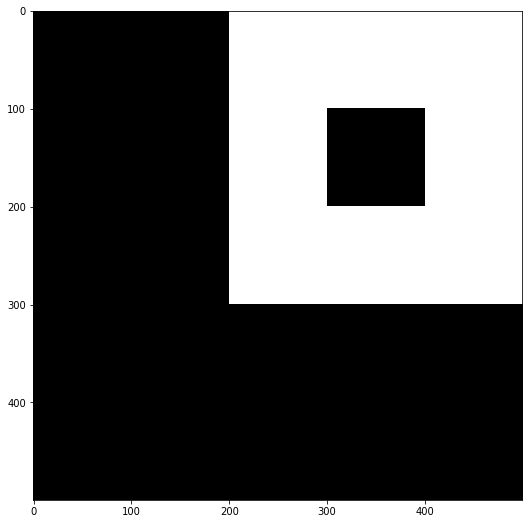

(<matplotlib.image.AxesImage at 0x7fe7c0276340>, None)

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 9))
plt.imshow(cv2.resize(img, (500, 500), interpolation=0), 'gray'),plt.show()

Credits: [Sergio Canu](https://pysource.com/)